In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from math import sqrt
import evaluate
from IPython.display import display, HTML

Punchline: is our model better than the model that just predicts the average?

The best model we can make with no additional information: $\hat{y} = \bar{y}$

**Baseline comes from train split!**

- rmse: how far off the typical prediction is; same units as the target; smaller is better
- R2: variance in y explained by X; closer to 1 is better

# Exercises

**1. Load the tips dataset from either pydataset or seaborn.**

In [ ]:
df= data('tips')

In [ ]:
df.head()

In [ ]:
df.describe().T

**2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.**

Here is some sample code to get you started:

In [ ]:
# from sklearn.linear_model import LinearRegression


# #assuming X and y are already defined
# model = LinearRegression().fit(X, y)
# predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the tips dataset.

In [ ]:
#baseline
df['yhat_baseline'] = df['tip'].mean()

In [ ]:
#asigne values to my X and y
X = df[['total_bill']]
y = df['tip']

In [ ]:
#create a model
model = LinearRegression().fit(X, y)
#model = LinearRegression().fit(df[['total_bill']], df['tip'])

In [ ]:
# compute predictions and add to original dataframe
df['yhat']= model.predict(X)

In [ ]:
df.head()

**3. Plot the residuals for the linear regression model that you made.**

In [ ]:
# compute residuals
#df['residual'] = df['yhat'] - df['y']
# y = df['tip']

df['residuals'] = df['yhat'] - df['tip']
df['residuals_baseline'] = df ['yhat_baseline'] - df['tip']


In [ ]:
df.head()

In [ ]:
df.residuals.plot.hist()
plt.show()

In [ ]:
df.residuals_baseline.plot.hist()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.hist(df.residuals_baseline, label='baseline residuals', alpha=.6)
ax.hist(df.residuals, label='model residuals', alpha=.6)
ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(df.tip, df.residuals)
ax.set(ylabel='residual', xlabel='actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))

ax.scatter(df.tip, df.residuals_baseline)
ax.set(ylabel='residuals_baseline', xlabel='actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')
ax.grid()

**4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.**

- **sum of squared errors** (SSE, a.k.a RSS, Residual Sum of Squares) 

Sometime the SSE will be used as the final metric to evaluate. Most times, however, this is used as a stepping stone to the other metrics, such as MSE and RMSE. **If outliers matter, this is a good metric to use.**

In [ ]:
#calculate manually 
# square each residual value
df['residual^2'] = df.residuals ** 2

df['residuals_baseline^2'] = df.residuals_baseline ** 2

df.head(3)

In [ ]:
# SSE
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residuals_baseline^2'])

print("SSE = ", SSE)
print("SSE  baseline = ", SSE_baseline)

In [ ]:
#now calculate SSE using sklearn
SSE2 = mean_squared_error(df.tip, df.yhat)*len(df)
SSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)*len(df)
print("SSE2 = ", SSE2)
print("SSE2  baseline = ", SSE2_baseline) 

- **Total Sum of Squares** (TSS) is the sum of difference between the actual final grade and the mean of all final grades. It can also be derived by summing the ESS and SSE.

In [ ]:
ess = ((df.yhat - df.tip.mean())**2).sum()
tss = ((df.tip - df.tip.mean())**2).sum()

ess / tss

In [ ]:
print("SSE manual == SSE sklearn: ", round (SSE,2) == round(SSE2,2)) 
print("SSE manual - baseline == SSE sklearn - baseline: ", round(SSE_baseline,2) == round (SSE2_baseline,2))

- **mean squared error** (MSE)

We arrive at this by dividing your SSE by the total number of data points, i.e. the average of your errors that have each been squared. **If outliers don't matter as much, but cost exponential instead of linear, then this is a good metric to use**. That means that a residual of 10 (the expected value is 10 units off the actual value) is greater than twice a residual of 5

In [ ]:
#calculate manually 
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

In [ ]:
# use sklearn
MSE2 = mean_squared_error(df.tip, df.yhat)

MSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)
print("MSE = ", MSE2)
print("MSE baseline = ", MSE_baseline)

In [ ]:
print("MSE manual == MSE sklearn: ", round(MSE,3) == round( MSE2,3)) 
print("MSE manual  baseline == MSE sklearn baseline: ", round(MSE_baseline,3) == round(MSE2_baseline,3)) 

- **root mean squared error** (RMSE)

we can use the MSE to compute the Root Mean Squared Error, RMSE

In [ ]:

RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

We can see that the model is off by an average of 1.017  points, while the baseline is off by an average of 1.38  points. The model does better than having no model at all.

**5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).**

- sum of squared errors

In [ ]:
df['residuals_baseline^2'] = df.residuals_baseline ** 2
SSE_baseline = sum(df['residuals_baseline^2'])

print("SSE  baseline = ", SSE_baseline)

- Total Sum of Squares (TSS)

In [ ]:
ess_b = ((df.yhat_baseline - df.tip.mean())**2).sum()
tss_b = ((df.tip - df.tip.mean())**2).sum()


ess_b / tss_b

- root mean squared error

In [ ]:
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE baseline = ", RMSE_baseline)

**6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.**

In [ ]:
if SSE < SSE_baseline :
    print (" Your model perfomed better that baseline")
else: 
    print ("your model performed bellow the baseline")

**7. What is the amount of variance explained in your model?**

**R2: variance in tip explained by total_bill; closer to 1 is better**

In [ ]:
r2_score(df.tip, df.yhat)

In [ ]:
explained_variance_score(df.tip, df.yhat)

**8. Is your model better than the baseline model?**

**9. Create a file named evaluate.py that contains the following functions.**

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

**- plot_residuals(y, yhat): creates a residual plot**

In [ ]:
def plot_residuals ( df, y, yhat ):
    '''
    Takes in a dataframe , y = column with actual_values and yhat= name of the columns with predicted_values
    and creates a residual plot
    
    Example:
    plot_residuals(df, 'tip', 'yhat')
    '''


    
    #baseline
    df['yhat_baseline'] = df[y].mean()


    # residuals
    df['residuals'] = df[yhat] - df[y]
    df['residuals_baseline'] = df ['yhat_baseline'] - df[y]

    # plot
    fig, ax = plt.subplots(figsize=(13, 7))
    ax.hist(df.residuals_baseline, label='baseline residuals', alpha=.6)
    ax.hist(df.residuals, label='model residuals', alpha=.6)
    ax.legend()
    plt.show()
    return

In [ ]:
plot_residuals(df, 'tip', 'yhat')

In [12]:

def plot_residuals2(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

In [ ]:
plot_residuals2( df['tip'], df['yhat'])

- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)

In [ ]:
def regression_errors(df, y, yhat):
    '''
    Takes in a dataframe , y = column with actual_values and yhat= name of the columns with predicted_values
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    
    Example:
    plot_residuals(df, 'tip', 'yhat')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt
    
    
    #calculate SSE using sklearn
    SSE = mean_squared_error(df[y], df[yhat])*len(df)
    #explained sum of squares (ESS)
    ESS = ((df[yhat] - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE = mean_squared_error(df[y], df[yhat])
    #root mean squared error (RMSE)
    RMSE = sqrt(MSE)
    
    #create a dictionary
    m= {
        'sse': SSE,
        'ess': ESS,
        'rmse': RMSE,
        'tss': TSS,
        'mse': MSE,
        'r2': ESS/TSS,
    }

    return m

In [ ]:
m = defregression_errors (df, 'tip', 'yhat')

In [ ]:
m

In [ ]:
df1 = pd.DataFrame(m, index= ['model'])

**- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model**

In [ ]:
def baseline_mean_errors(df, y):
    '''
    Takes in a dataframe , y = column with actual_values 
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)

    Example:
    plot_residuals(df, 'tip')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt

    #baseline
    df['yhat_baseline'] = df[y].mean()

    #calculate SSE using sklearn
    SSE_baseline = mean_squared_error(df[y], df['yhat_baseline'])*len(df)
    #explained sum of squares (ESS)
    ESS_b = ((df.yhat_baseline - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS_b = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE_baseline = mean_squared_error(df[y], df.yhat_baseline)
    #root mean squared error (RMSE)
    RMSE_baseline = sqrt(MSE_baseline)
    
    #create dicc
    b ={
        'sse': SSE_baseline,
        'mse': MSE_baseline,
        'rmse': RMSE_baseline,
         'tss': TSS_b,
        'ess' : ESS_b,
        'mse': MSE_baseline,
        'r2': ESS_b/TSS_b,       
    }

    return b

In [ ]:
r = baseline_mean_errors(df,'tip')

In [ ]:
r

In [ ]:
df2 =pd.DataFrame(r, index= ['baseline'])

In [ ]:
table = pd.concat([df2, df1]).T
table

In [ ]:
table.style()

**- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false**

rmse: how far off the typical prediction is; same units as the target; smaller is better

In [ ]:
def better_than_baseline(df, y, yhat):
    '''
    Takes in a df, column with actual values,  and predicted values
    and returns true if your model performs better than the baseline, otherwise false
    '''    
    from IPython.display import display, HTML
    #baseline 
    b = baseline_mean_errors(df,y)
    #Model
    m = defregression_errors (df, y, yhat)
    
    df1 = pd.DataFrame(m, index= ['model'])
    df2 =pd.DataFrame(r, index= ['baseline'])
    table =pd.concat([df2, df1]).T
    display(HTML(table.to_html()))
    print('   ')

    if m['rmse']< b['rmse']:
        print ('Model performs better than the baseline: ',m['rmse']< b['rmse'] )
    else:
        print ('Model performs better than the baseline: ',m['rmse']< b['rmse'] )
    
    return

    

In [ ]:
better_than_baseline(df, 'tip', 'yhat')

**10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.**

In [2]:
mpg = data('mpg')

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
#baseline
mpg['yhat_baseline'] = mpg['hwy'].mean()

In [5]:
#create a model
#model = LinearRegression().fit(X, y)
model2 = LinearRegression().fit(mpg[['displ']], mpg['hwy'])

In [6]:
# compute predictions and add to original dataframe
mpg['yhat']= model2.predict(mpg[['displ']])

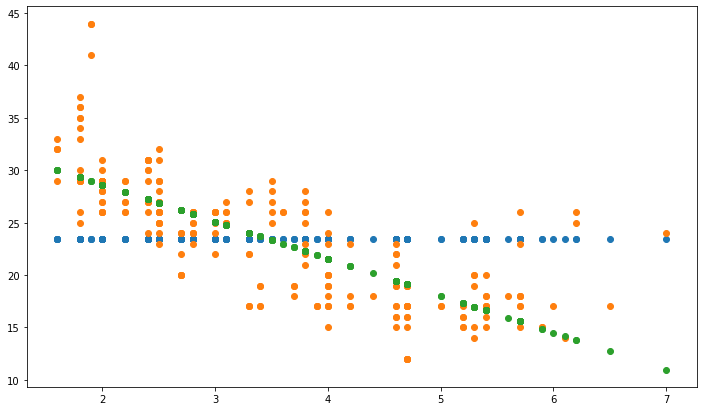

In [10]:
#plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(mpg.displ, mpg.yhat_baseline, label='baseline')
ax.scatter(mpg.displ, mpg.hwy, label='actual')
ax.scatter(mpg.displ, mpg.yhat, label='prediction')
plt.show()


In [8]:
evaluate.regression_errors(mpg, 'hwy', 'yhat')

{'sse': 3413.829008995467,
 'ess': 4847.8333841669255,
 'rmse': 3.8195566312014524,
 'tss': 8261.66239316239,
 'mse': 14.589012858954987,
 'r2': 0.586786672398904}

In [9]:
evaluate.better_than_baseline(mpg,'hwy', 'yhat')

,baseline,model
sse,8261.662393,3413.829009
mse,35.306250,14.589013
rmse,5.941906,3.819557
tss,8261.662393,8261.662393
ess,0.000000,4847.833384
r2,0.000000,0.586787


   
Model performs better than the baseline:  True


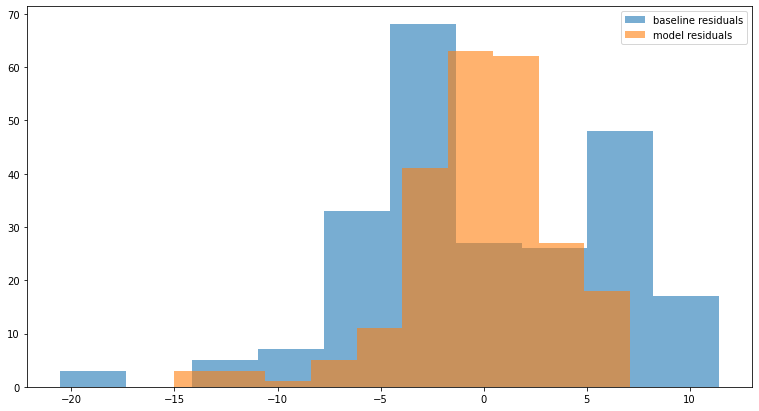

In [11]:
evaluate.plot_residuals(mpg,'hwy', 'yhat')

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

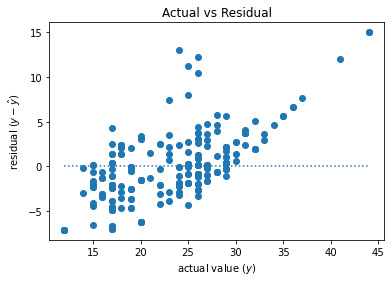

In [14]:
plot_residuals2(mpg['hwy'], mpg['yhat'])